In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('test_task.csv')

In [5]:
df.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0


In [6]:
df.columns

Index(['loanKey', 'rep_loan_date', 'first_loan', 'dpd_5_cnt', 'dpd_15_cnt',
       'dpd_30_cnt', 'first_overdue_date', 'close_loans_cnt',
       'federal_district_nm', 'TraderKey', 'payment_type_0', 'payment_type_1',
       'payment_type_2', 'payment_type_3', 'payment_type_4', 'payment_type_5',
       'past_billings_cnt', 'score_1', 'score_2', 'age', 'gender', 'bad_flag'],
      dtype='object')

In [7]:
region_cols=['federal_district_nm_region_0', 'federal_district_nm_region_1','federal_district_nm_region_2', 'federal_district_nm_region_3','federal_district_nm_region_4', 'federal_district_nm_region_5','federal_district_nm_region_6', 'federal_district_nm_region_7']
df[region_cols]=df[region_cols].astype(int)

KeyError: "None of [Index(['federal_district_nm_region_0', 'federal_district_nm_region_1',\n       'federal_district_nm_region_2', 'federal_district_nm_region_3',\n       'federal_district_nm_region_4', 'federal_district_nm_region_5',\n       'federal_district_nm_region_6', 'federal_district_nm_region_7'],\n      dtype='object')] are in the [columns]"

In [8]:
df['gender']=df['gender_True'].astype(int)

KeyError: 'gender_True'

In [9]:
df.describe()

,loanKey,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,bad_flag
count,4157.000000,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000,4157.000000
mean,525386.651431,1.444444,0.733333,0.280000,1.184693,12.338225,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222,0.100313
std,202001.338206,0.900599,0.764572,0.502339,1.723715,9.902927,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143,0.300453
min,58567.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000,0.000000
25%,363964.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000,0.000000
50%,543603.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000,0.000000
75%,687271.000000,2.000000,1.000000,1.000000,2.000000,14.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000,0.000000
max,884377.000000,7.000000,5.000000,3.000000,31.000000,80.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000,1.000000


In [34]:
from sklearn.model_selection import train_test_split
dpd_cols=['dpd_5_cnt','dpd_15_cnt','dpd_30_cnt']
df[dpd_cols]=df[dpd_cols].fillna(0)
df['total_dpd']=df[dpd_cols].sum(axis=1)
df['max_dpd']=df[dpd_cols].gt(0).dot([5,15,30])
df=df.fillna(0)
df['gender']=df['gender'].astype(int)

X=df.drop(columns='bad_flag')
X=X.drop(columns='first_loan')
X=X.drop(columns=['rep_loan_date','first_overdue_date','TraderKey'])
X['gender']=X['gender'].astype(int)
y=df['bad_flag']
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,test_size=.2,random_state=42)


In [35]:
X.head()


,loanKey,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,...,total_dpd,max_dpd,federal_district_nm_region_0,federal_district_nm_region_1,federal_district_nm_region_2,federal_district_nm_region_3,federal_district_nm_region_4,federal_district_nm_region_5,federal_district_nm_region_6,federal_district_nm_region_7
0,708382,0.0,0.0,0.0,3.0,0,0,10,0,0,...,0.0,0,False,False,False,False,False,False,True,False
1,406305,1.0,0.0,0.0,0.0,0,0,6,0,0,...,1.0,5,False,False,False,False,False,False,True,False
2,779736,0.0,0.0,0.0,2.0,0,0,0,5,0,...,0.0,0,False,True,False,False,False,False,False,False
3,556376,0.0,0.0,0.0,1.0,0,0,4,0,0,...,0.0,0,False,False,False,False,False,False,True,False
4,266968,0.0,0.0,0.0,0.0,0,3,0,0,0,...,0.0,0,False,False,False,False,False,True,False,False


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [40]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)
y_pred_lr=lr.predict(X_test_scaled)
y_prob_lr=lr.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test,y_pred_lr))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95       749
           1       0.50      0.01      0.02        83

    accuracy                           0.90       832
   macro avg       0.70      0.51      0.49       832
weighted avg       0.86      0.90      0.86       832



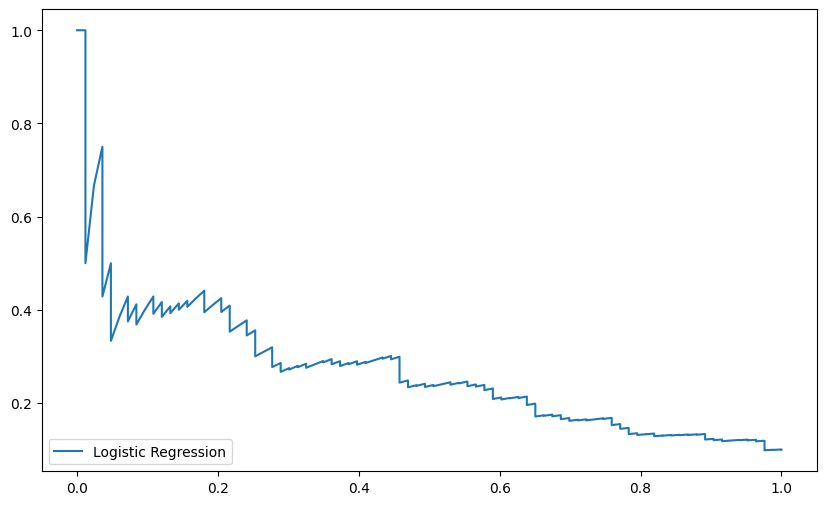

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve,auc
precision_lr, recall_lr,_=precision_recall_curve(y_test,y_prob_lr)
auc_lr=auc(recall_lr, precision_lr)
plt.figure(figsize=(10,6))
plt.plot(recall_lr,precision_lr,label=f'Logistic Regression')
plt.xlabel=("Recall")
plt.ylabel=("Precision")
plt.legend(loc='lower left')
plt.show()

In [42]:
xgb=XGBClassifier(use_label_encoder=False,eval_metric='logloss')
xgb.fit(X_train,y_train)
ypred_xgb=xgb.predict(X_test)
yproba_xgb=xgb.predict_proba(X_test)[:,1]
print(classification_report(y_test,ypred_xgb))





              precision    recall  f1-score   support

           0       0.92      0.97      0.94       749
           1       0.46      0.20      0.28        83

    accuracy                           0.90       832
   macro avg       0.69      0.59      0.61       832
weighted avg       0.87      0.90      0.88       832



C:\Users\JHuang4\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:31:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [47]:
xgb_score=xgb.score(X_train,y_train)
log_score=lr.score(X_train_scaled,y_train)
print("xgb score:",xgb_score)
print("log_score:",log_score)

xgb score: 0.9897744360902255
log_score: 0.9004511278195488


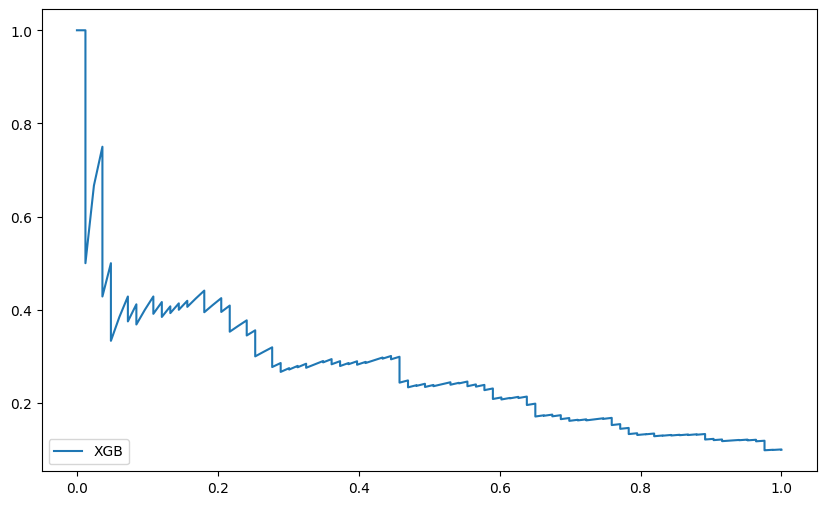

In [59]:
precision_xgb, recall_xgb,_=precision_recall_curve(y_test,yproba_xgb)
auc_xgb=auc(recall_xgb, precision_xgb)
plt.figure(figsize=(10,6))
plt.plot(recall_lr,precision_lr,label=f'XGB')
plt.xlabel=("Recall")
plt.ylabel=("Precision")
plt.legend(loc='lower left')
plt.show()

In [52]:
df['default_probability']=xgb.predict_proba(X)[:,1]
at_risk_loans=df[df['default_probability']>=.5][['loanKey','default_probability']]
at_risk_loans

,loanKey,default_probability
7,256097,0.891377
9,254453,0.891377
27,427218,0.829757
32,221282,0.810701
33,375071,0.560380
...,...,...
4140,735376,0.897544
4145,583895,0.705150
4147,615674,0.713299
4151,624454,0.543201
